# Walkthrough

In [1]:
from classes import preprocess, eda, LDA, KMeansClustering, sentiment_analysis, models

c:\users\mdfl0\appdata\local\programs\python\python39\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdfl0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data preparation (with\out duplicates)


In [2]:
df_non_duplicates = preprocess(df='bam_aquino.csv',added_stopwords='filipino_stopwords.csv', sent_column='Comment Validation', 
                               comment_column='Comment', dups=1, drop=['Video Link', 'Comment Image Rate'])

Comment                  0
Comment type             1
Comment Image Rate       0
Account                  0
Comment Validation       5
Notes                   11
Video Link               0
Unnamed: 7            3982
dtype: int64
drop
shape of dataframe:  (2807, 8)


In [3]:
df_duplicates = preprocess(df='bam_aquino.csv',added_stopwords='filipino_stopwords.csv', sent_column='Comment Validation',
                           comment_column='Comment',dups=0, drop=['Video Link', 'Comment Image Rate'])

Comment                  0
Comment type             1
Comment Image Rate       0
Account                  0
Comment Validation       5
Notes                   11
Video Link               0
Unnamed: 7            3982
dtype: int64
shape of dataframe:  (5496, 8)


In [4]:
df_duplicates.df['Comment Validation'].value_counts()

2.0    3406
0.0    1496
1.0     467
Name: Comment Validation, dtype: int64

In [5]:
df_non_duplicates.df['Comment Validation'].value_counts()

2.0    1649
0.0     882
1.0     270
Name: Comment Validation, dtype: int64

# Duplicate values

## Phase 1: comments related to Bam

### A. Facts and analysis

In [6]:
eda_instance = eda(df_duplicates.df, text_column_name='features_string_format', sent_column_name='Comment Validation')

In [8]:
# total number of comments
df_duplicates.df['Comment'].notnull().sum().sum()

5374

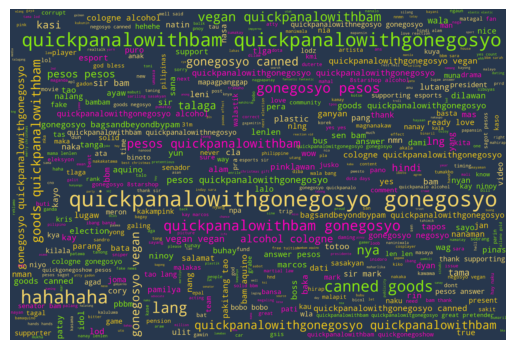

In [9]:
eda_instance.generate_wordcloud(filename='all_comment')

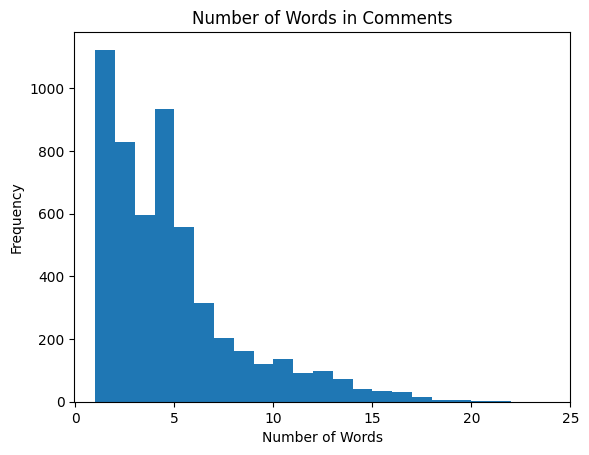

In [10]:
eda_instance.word_number()

## Sentiment Comments

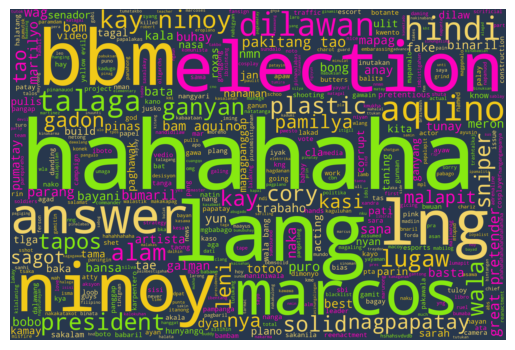

In [10]:
eda_instance.generate_wordcloud(filename='negative_bam', category='Comment Validation', value=0)

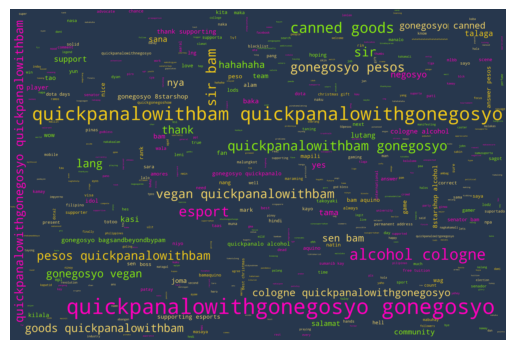

In [11]:
eda_instance.generate_wordcloud(filename='positive_bam', category='Comment Validation', value=2)

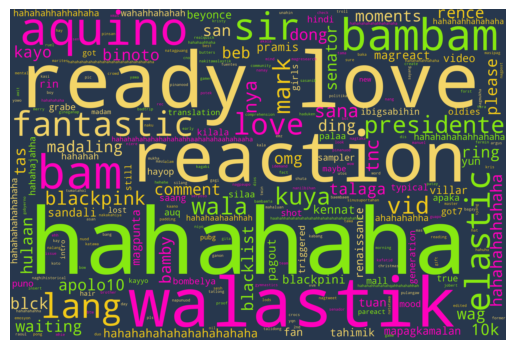

In [12]:
eda_instance.generate_wordcloud(filename='neutral_bam', category='Comment Validation', value=1)

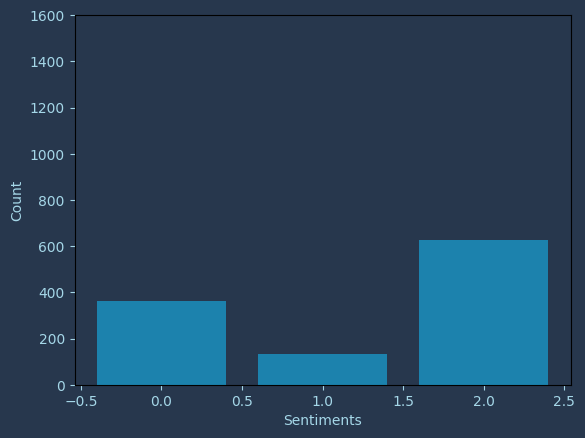

In [13]:
# 0.0 as negative, 1.0 as neutral, 2.0 positive
eda_instance.bar_sentiment('Comment Validation', 'bam')

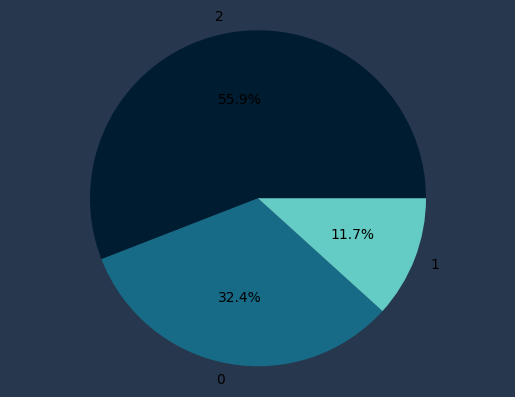

In [14]:
# 2 as positive, 1 as neutral,0 as negative
eda_instance.pie_sentiment(filename='bam', column_name='Comment Validation')

# Train the model on the given data (in progress)

In [13]:
x = models(df=preprocess_instance.df, x='review', y='rating')

In [14]:
x.bert_classification(15)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 article (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['article[0][0]']                
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [16]:
x.evaluate_model('bert')

7/7 [==============================] - 10s 2s/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [ ]:
y = models(df=preprocess_instance.df, x='review', y='rating')

In [ ]:
y.svm()

In [ ]:
y.evaluate_model('svm')

# Call the LDA topic modelling object

In [7]:
model = LDA(preprocess_instance.df)
model.output()

c:\users\mdfl0\appdata\local\programs\python\python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
c:\users\mdfl0\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


# Call the sentiment analysis object

In [14]:
sent = sentiment_analysis(preprocess_instance.df)

In [15]:
# create visualization object for the sentiment analysis
eda_sent_instance = eda(sent.df, text_column_name='features_string_format', sent_column_name='english_sents')

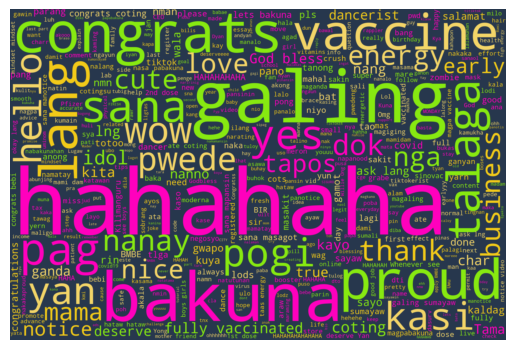

In [16]:
eda_sent_instance.generate_wordcloud(filename='all')

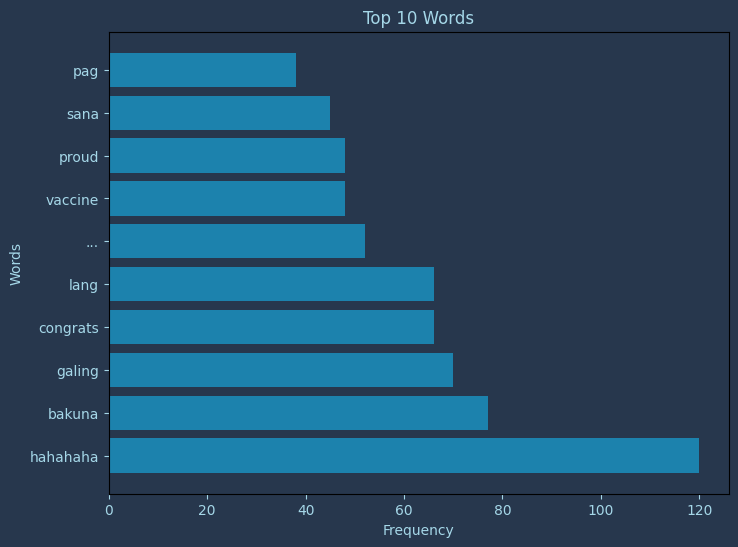

In [17]:
eda_sent_instance.top_10words()

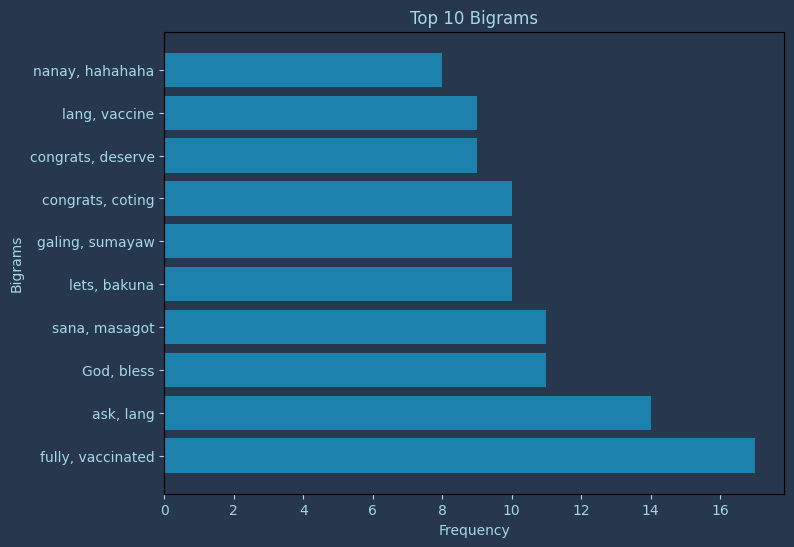

In [18]:
eda_sent_instance.bigrams()

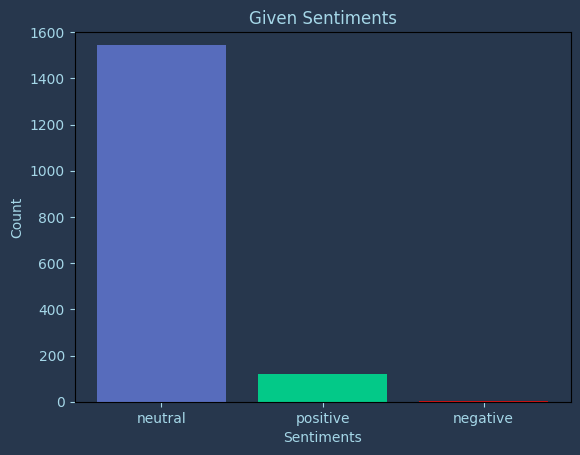

In [19]:
eda_sent_instance.plot_sentiment('Comment type', 'Original')

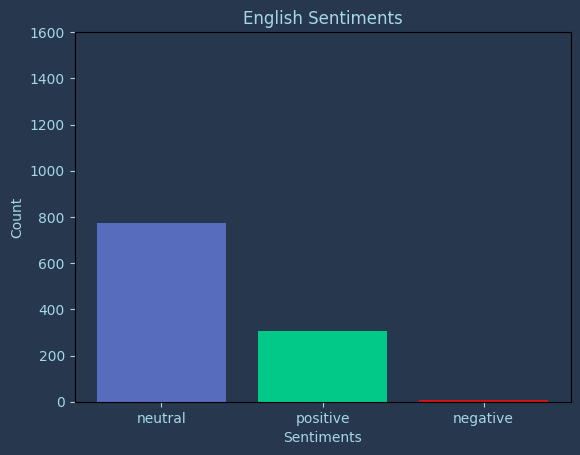

In [20]:
eda_sent_instance.plot_sentiment('english_sents', 'English')

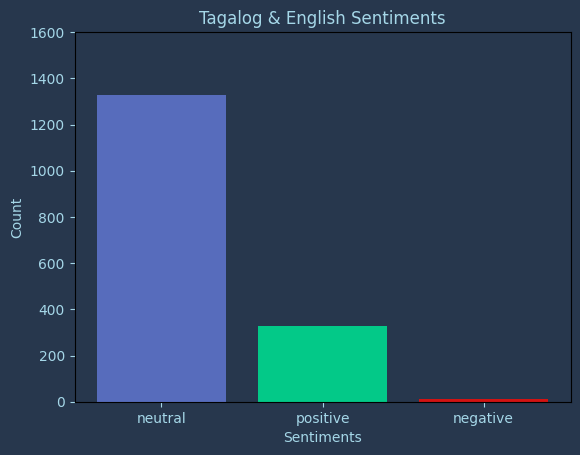

In [21]:
eda_sent_instance.plot_sentiment('sentiments', 'Final')

In [8]:
# given sentiments
preprocess_instance.df['Comment type'].value_counts()

KeyError: 'Comment type'

In [ ]:
# sentiments done by VADER model
eda_sent_instance.df['sentiments'].value_counts()

In [ ]:
eda_sent_instance.df.head()

In [25]:
eda_sent_instance.df.to_csv('sentiments.csv')

In [26]:
# end of program